# Convolutional Neural Networks

# Image Convolution and Pooling

## Apply convolution on a custom image and display the results.

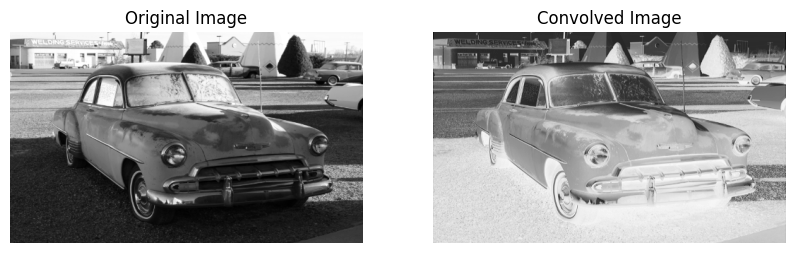

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load a sample image
image_path = 'img.png'
img = tf.image.decode_image(tf.io.read_file(image_path), channels=1)
img = tf.image.resize(img, [300, 500])  # Resize for simplicity
img = tf.cast(img, tf.float32) / 255.0  # Normalize pixel values


# Define a convolutional kernel
kernel = tf.constant([[0, 1, 0],
                      [1, -8, 1],
                      [0, 1, 0]], dtype=tf.float32)
kernel = tf.reshape(kernel, [3, 3, 1, 1])  # Shape: [kernel_height, kernel_width, input_channels, output_channels]

# Apply convolution
convolved = tf.nn.conv2d(
    img[tf.newaxis, ..., tf.newaxis],  # Add batch and channel dimensions
    filters=kernel,
    strides=[1, 1, 1, 1],
    padding='SAME'
)

# Display original and convolved images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img.numpy().squeeze(), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Convolved Image")
plt.imshow(convolved.numpy().squeeze(), cmap='gray')
plt.axis('off')

plt.show()


## Perform max-pooling, depth-wise pooling, and average pooling on the convoluted images.

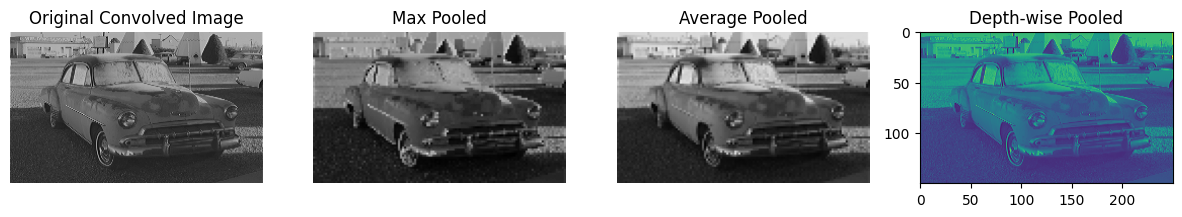

In [ ]:
# Load and preprocess the image
image_path = 'img.png' # Use the local file path directly
img = tf.image.decode_image(tf.io.read_file(image_path), channels=1)
img = tf.image.resize(img, [150, 250])  # Resize for simplicity
img = tf.cast(img, tf.float32) / 255.0  # Normalize pixel values


# Define a convolutional kernel
kernel = tf.constant([[0, -1, 0],
                      [-1, 5, -1],
                      [0, -1, 0]], dtype=tf.float32)
kernel = tf.reshape(kernel, [3, 3, 1, 1])  # Shape: [kernel_height, kernel_width, input_channels, output_channels]

# Apply convolution
convolved = tf.nn.conv2d(
    img[tf.newaxis, ..., tf.newaxis],  # Add batch and channel dimensions
    filters=kernel,
    strides=[1, 1, 1, 1],
    padding='SAME'
)

convolved = tf.squeeze(convolved, axis=-2) # Remove the extra dimension


# Apply pooling operations directly to the convolved output
# No need to reshape to arbitrary dimensions
max_pooled = tf.nn.max_pool2d(convolved, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
avg_pooled = tf.nn.avg_pool2d(convolved, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Simulate depth-wise pooling (sum pooling across channels, no-op for grayscale images)
depth_pooled = tf.reduce_sum(convolved, axis=-1, keepdims=True)

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title("Original Convolved Image")
plt.imshow(convolved.numpy().squeeze(), cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Max Pooled")
plt.imshow(max_pooled.numpy().squeeze(), cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Average Pooled")
plt.imshow(avg_pooled.numpy().squeeze(), cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Depth-wise Pooled")
plt.imshow(depth_pooled.numpy().squeeze())

# Convolutional Neural Network (CNN) for MNIST Fashion Dataset

## Train a CNN to classify the MNIST Fashion dataset.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.7382 - loss: 0.7289 - val_accuracy: 0.8673 - val_loss: 0.3763
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 0.8710 - loss: 0.3508 - val_accuracy: 0.8767 - val_loss: 0.3389
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.8936 - loss: 0.2935 - val_accuracy: 0.8938 - val_loss: 0.2928
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9050 - loss: 0.2579 - val_accuracy: 0.8934 - val_loss: 0.2913
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9121 - loss: 0.2402 - val_accuracy: 0.8954 - val_loss: 0.2878
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9203 - loss: 0.2155 - val_accuracy: 0.9017 - val_loss: 0.2685
Epoch 7/10
750/750 ━━━━━━━━━━━━━

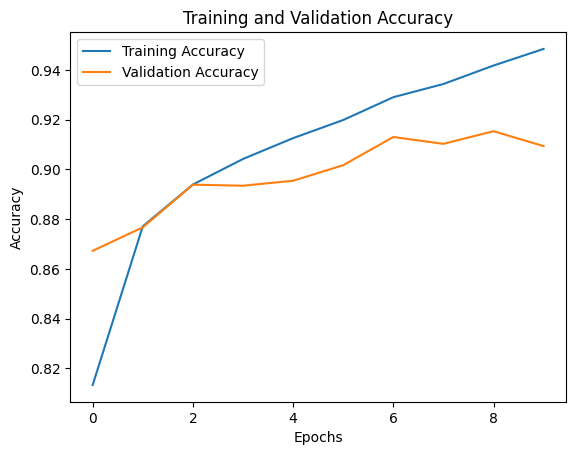

In [ ]:
from tensorflow.keras import layers, models


# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channel dimension (grayscale images have one channel)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7560 - loss: 0.7031 - val_accuracy: 0.8526 - val_loss: 0.4091
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8591 - loss: 0.3875 - val_accuracy: 0.8553 - val_loss: 0.3995
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8742 - loss: 0.3369 - val_accuracy: 0.8640 - val_loss: 0.3694
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8848 - loss: 0.3145 - val_accuracy: 0.8783 - val_loss: 0.3401
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8893 - loss: 0.2949 - val_accuracy: 0.8807 - val_loss: 0.3276
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8962 - loss: 0.2766 - val_accuracy: 0.8773 - val_loss: 0.3439
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8980 - loss: 0.2722 - val_accuracy: 0.8860 - val_loss: 0.3158
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9045 - loss: 0.2564 - val_accuracy: 0

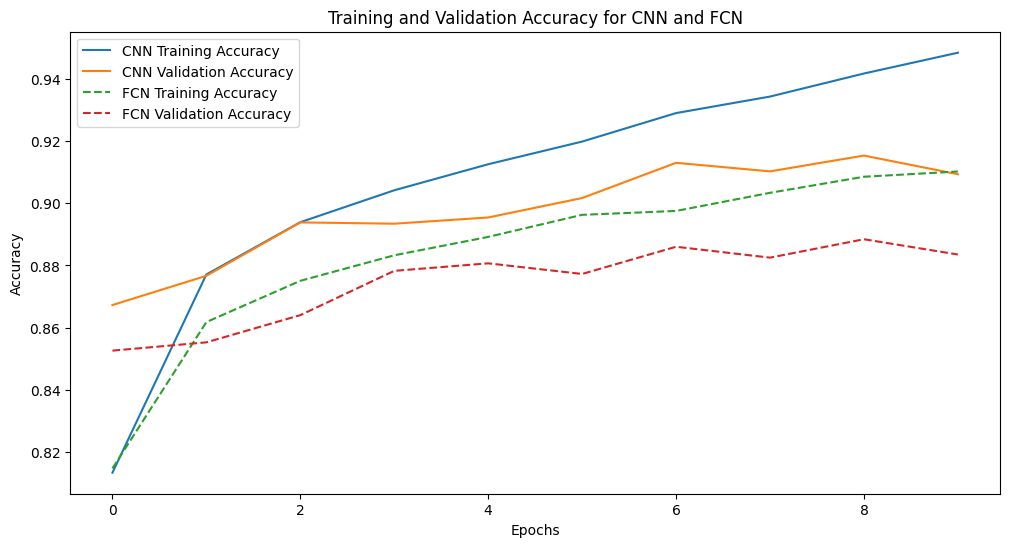

In [ ]:
# Define the FCN model
fcn_model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Input layer with 28x28 grayscale images
    layers.Flatten(),  # Flatten the 2D input into a 1D vector
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    layers.Dense(128, activation='relu'),  # Another fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the FCN model
fcn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the FCN model
fcn_history = fcn_model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

# Evaluate the FCN model
fcn_test_loss, fcn_test_accuracy = fcn_model.evaluate(x_test, y_test)
print(f"FCN Test accuracy: {fcn_test_accuracy:.2f}")

# Plot training and validation accuracy for both models
plt.figure(figsize=(12, 6))

plt.plot(history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(fcn_history.history['accuracy'], label='FCN Training Accuracy', linestyle='--')
plt.plot(fcn_history.history['val_accuracy'], label='FCN Validation Accuracy', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for CNN and FCN')
plt.show()


# Implement ResNet-34 Using Keras.

## Implement the ResNet-34 architecture.

In [ ]:
from tensorflow.keras import layers, models

# Residual block definition
def residual_block(input_tensor, filters, strides=(1, 1), use_projection=False):
    shortcut = input_tensor
    if use_projection:
        # Use a projection layer to match dimensions when strides > 1
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same')(input_tensor)
        shortcut = layers.BatchNormalization()(shortcut)

    # First convolution
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', kernel_initializer='he_normal')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Second convolution
    x = layers.Conv2D(filters, (3, 3), strides=(1, 1), padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)

    # Add shortcut
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

# ResNet-34 model definition
def build_resnet34(input_shape=(224, 224, 3), num_classes=1000):
    inputs = layers.Input(shape=input_shape)

    # Initial convolution and max pooling
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Residual blocks
    # 3 blocks of 64 filters
    for _ in range(3):
        x = residual_block(x, 64)

    # 4 blocks of 128 filters
    x = residual_block(x, 128, strides=(2, 2), use_projection=True)
    for _ in range(3):
        x = residual_block(x, 128)

    # 6 blocks of 256 filters
    x = residual_block(x, 256, strides=(2, 2), use_projection=True)
    for _ in range(5):
        x = residual_block(x, 256)

    # 3 blocks of 512 filters
    x = residual_block(x, 512, strides=(2, 2), use_projection=True)
    for _ in range(2):
        x = residual_block(x, 512)

    # Global average pooling and dense layer
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Build the ResNet-34 model
resnet34 = build_resnet34(input_shape=(28, 28, 1), num_classes=10)  # Adjust num_classes for your dataset
resnet34.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_38 (Conv2D)        │ (None, 14, 14, 64)     │          3,200 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_36    │ (None, 14, 14, 64)     │            256 │ conv2d_38[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_33 (ReLU)           │ (None, 14, 14, 64)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 7, 7, 64)       │              0 │ re_lu_33[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_39 (Conv2D)        │ (None, 7, 7, 64)       │         36,928 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_37    │ (None, 7, 7, 64)       │            256 │ conv2d_39[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_34 (ReLU)           │ (None, 7, 7, 64)       │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_40 (Conv2D)        │ (None, 7, 7, 64)       │         36,928 │ re_lu_34[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_38    │ (None, 7, 7, 64)       │            256 │ conv2d_40[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_16 (Add)              │ (None, 7, 7, 64)       │              0 │ batch_normalization_3… │
│                           │                        │                │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_35 (ReLU)           │ (None, 7, 7, 64)       │              0 │ add_16[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_41 (Conv2D)        │ (None, 7, 7, 64)       │         36,928 │ re_lu_35[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_39    │ (None, 7, 7, 64)       │            256 │ conv2d_41[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_36 (ReLU)           │ (None, 7, 7, 64)       │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_42 (Conv2D)        │ (None, 7, 7, 64)       │         36,928 │ re_lu_36[0][0]         │
├──────────────────────

 Total params: 21,309,066 (81.29 MB)

 Trainable params: 21,292,042 (81.22 MB)

 Non-trainable params: 17,024 (66.50 KB)

# train the model

In [17]:
resnet34.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

history = resnet34.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3566s 4s/step - accuracy: 0.7719 - loss: 0.6877 - val_accuracy: 0.8167 - val_loss: 0.5422
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3604s 4s/step - accuracy: 0.8807 - loss: 0.3268 - val_accuracy: 0.5616 - val_loss: 3.3053
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3612s 4s/step - accuracy: 0.8858 - loss: 0.3185 - val_accuracy: 0.8751 - val_loss: 0.3481
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3591s 4s/step - accuracy: 0.9057 - loss: 0.2534 - val_accuracy: 0.8943 - val_loss: 0.2932
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3555s 4s/step - accuracy: 0.9063 - loss: 0.2649 - val_accuracy: 0.8787 - val_loss: 0.3610
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3531s 4s/step - accuracy: 0.9090 - loss: 0.2540 - val_accuracy: 0.8865 - val_loss: 0.3280
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3561s 4s/step - accuracy: 0.9169 - loss: 0.2281 - val_accuracy: 0.8968 - val_loss: 0.2806
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3564s 4s/step - accuracy: 0.9260 - loss: 0.2027 - 

## Analyze and visualize training history.

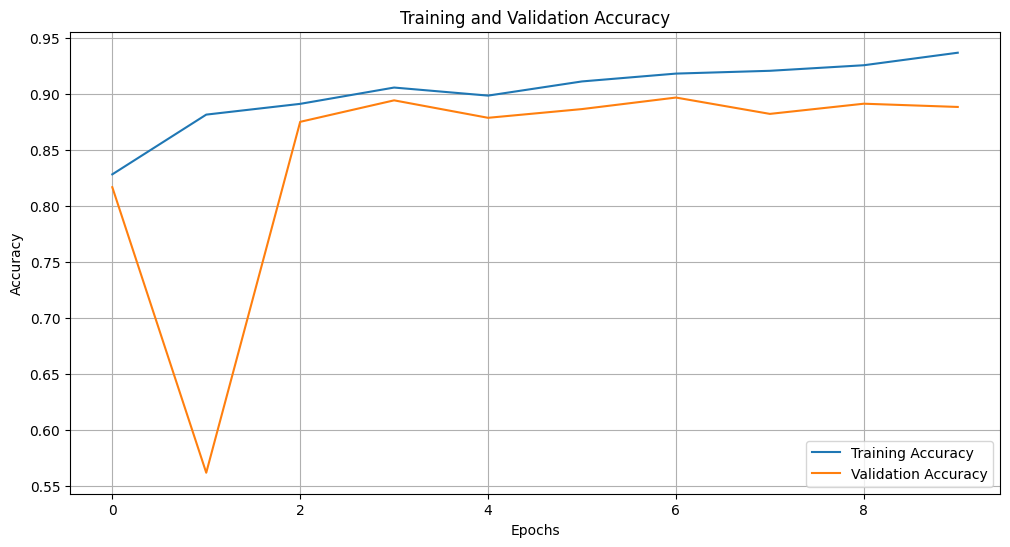

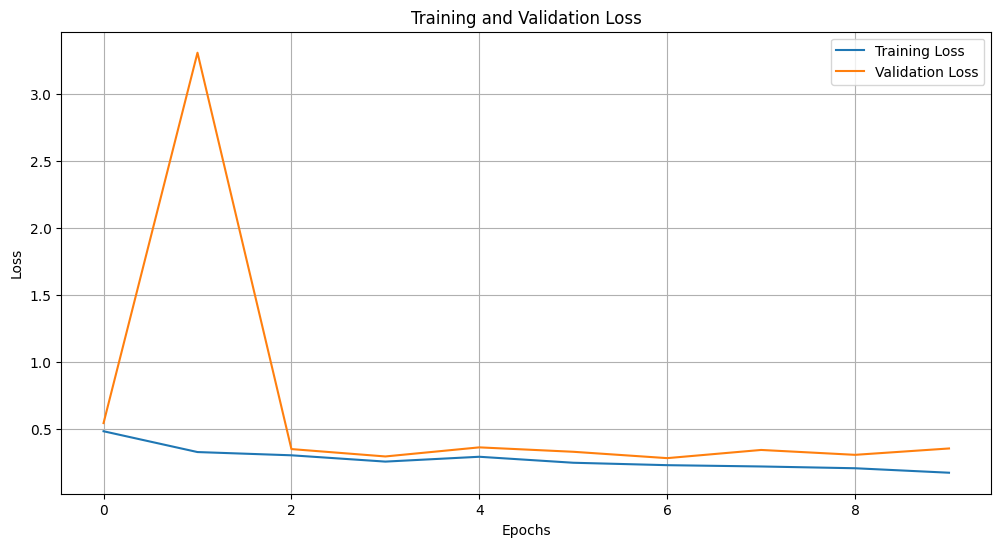

Final Training Accuracy: 0.9369
Final Validation Accuracy: 0.8884
Final Training Loss: 0.1718
Final Validation Loss: 0.3527


In [18]:
import matplotlib.pyplot as plt

# Extract accuracy and loss information
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_accuracy))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the final training and validation accuracy
final_train_accuracy = train_accuracy[-1]
final_val_accuracy = val_accuracy[-1]
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

# Print the final training and validation loss
final_train_loss = train_loss[-1]
final_val_loss = val_loss[-1]
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")


# Transfer Learning with Xception Model

## Load the tf_flowers dataset and split it into training, validation, and testing datasets.

In [7]:
import tensorflow as tf

# Load the tf_flowers dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

# Parameters
batch_size = 32
img_size = (224, 224)

# Create the raw dataset
raw_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    label_mode='int',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

# Split datasets
dataset_size = tf.data.experimental.cardinality(raw_dataset).numpy()
train_size = int(0.7 * dataset_size)  # 70% for training
val_size = int(0.15 * dataset_size)  # 15% for validation
test_size = dataset_size - train_size - val_size  # Remaining 15% for testing

train_dataset = raw_dataset.take(train_size)
test_dataset = raw_dataset.skip(train_size).take(test_size)
validation_dataset = raw_dataset.skip(train_size + test_size)

# Display dataset sizes
print(f"Training size: {train_size} batches")
print(f"Validation size: {val_size} batches")
print(f"Test size: {test_size} batches")


Found 3670 files belonging to 5 classes.
Training size: 80 batches
Validation size: 17 batches
Test size: 18 batches


## Preprocess and resize the images.

In [8]:
# Preprocessing function
def preprocess_dataset(image, label):
    image = tf.image.resize(image, img_size)  # Resize to target dimensions
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label

# Preprocess and optimize the datasets
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.map(preprocess_dataset).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.map(preprocess_dataset).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.map(preprocess_dataset).prefetch(buffer_size=AUTOTUNE)


## Transfer Learning with Xception Model.

### Freeze the weights of the pre-trained layers.

In [9]:
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models

# Load the pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for the classification task
model = models.Sequential([
    base_model,  # Add the pre-trained base model
    layers.GlobalAveragePooling2D(),  # Pool the features from the base model
    layers.Dense(256, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,388,594 (81.59 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

### Train the model.

In [10]:
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=10, batch_size=32)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 768s 10s/step - accuracy: 0.6642 - loss: 0.9531 - val_accuracy: 0.8502 - val_loss: 0.4131
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 790s 9s/step - accuracy: 0.8575 - loss: 0.3922 - val_accuracy: 0.8839 - val_loss: 0.3462
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 803s 9s/step - accuracy: 0.9044 - loss: 0.2920 - val_accuracy: 0.8670 - val_loss: 0.3586
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 794s 9s/step - accuracy: 0.9076 - loss: 0.2639 - val_accuracy: 0.8558 - val_loss: 0.3864
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 793s 9s/step - accuracy: 0.9325 - loss: 0.2224 - val_accuracy: 0.8933 - val_loss: 0.2954
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 743s 9s/step - accuracy: 0.9465 - loss: 0.1688 - val_accuracy: 0.8970 - val_loss: 0.3163
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 736s 9s/step - accuracy: 0.9504 - loss: 0.1407 - val_accuracy: 0.8727 - val_loss: 0.3460
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 744s 9s/step - accuracy: 0.9585 - loss: 0.1333 - val_accuracy: 0.8895 - 

### Evaluate the model and eport the results (e.g., accuracy, loss).

In [12]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 145s 8s/step - accuracy: 0.9521 - loss: 0.1631
Test Loss: 0.2222
Test Accuracy: 0.9306


### Visualize Training and Validation Metrics.

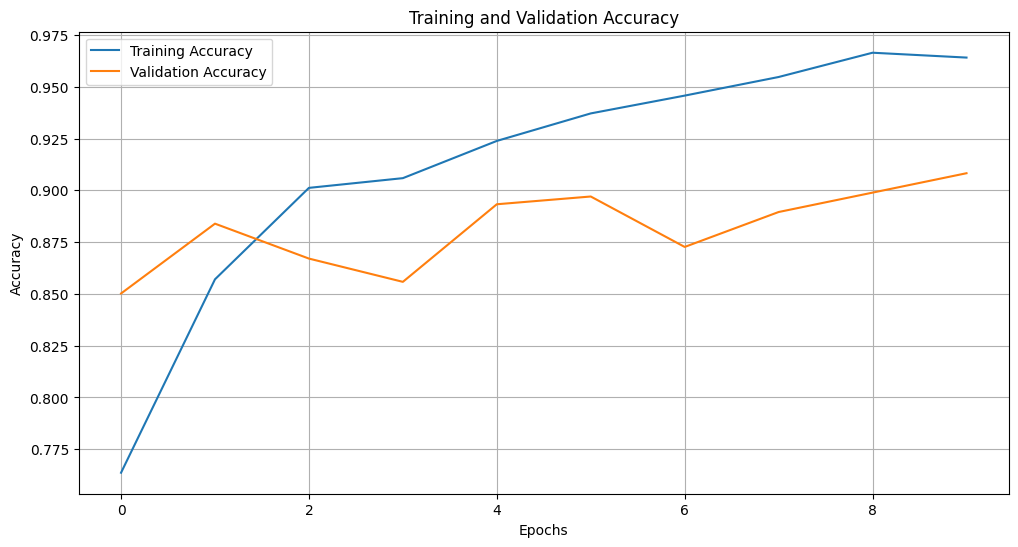

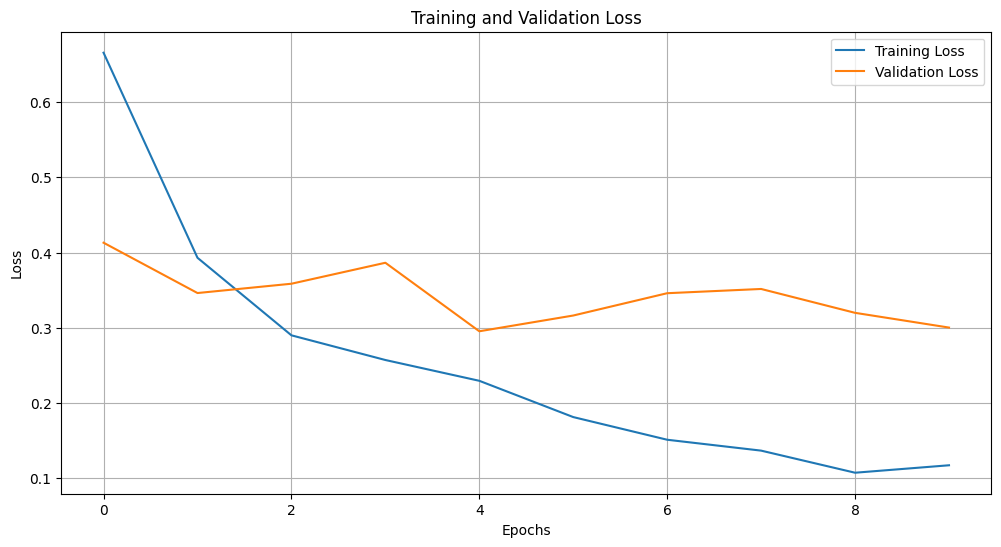

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()
